# Dataset provided contains:
- Basic details of leads
- Hierarchy structure of sales managers and their assigned leads
- Lead interaction details
- Demo watched details of leads
- Reason for not being interested
1. lead_basic_details: Contains details of the leads.

2. sales_managers_assigned_leads_details: Contains the details of the senior and junior sales managers and their assigned leads.

    - Each senior sales manager is assigned to 4 junior sales managers.
    - Each junior sales manager is assigned few leads in each cycle (a cycle is approximately a week).
3. leads_interaction_details: Contains the details of call interactions of junior sales managers with the leads.

    - A lead can drop out at any stage of the flow. If there is no call by the junior sales manager to the lead after a certain stage then the lead is considered as dropped at that stage.
4. leads_demo_watched_details: Contains the details of the demo session watched by the leads.

5. leads_reasons_for_no_interest: Contains the details of the reasons given by the leads for their lack of interest.

# Tables Description
1. lead_basic_details
    - lead_id: unique id of the lead [string]
    - age: age of the lead [int]
    - gender: gender of the lead [string]
    - current_city: city of residence of the lead [string]
    - current_education: current education details of the lead [string]
    - parent_occupation: occupation of the parent of the lead [string]
    - lead_gen_source: source from which the lead is generated [string]
2. sales_managers_assigned_leads_details
    - snr_sm_id: unique id of the senior sales manager [string]
    - jnr_sm_id: unique id of the junior sales manager [string]
    - assigned_date: date at which certain leads are assigned to junior sales manager [date]
    - cycle: cycle in which the lead is assigned [string]
    - lead_id: unique id of the lead [string]
3. leads_interaction_details:
    - jnr_sm_id: unique id of the junior sales manager [string]
    - lead_id: unique id of the lead [string]
    - lead_stage: stage of the lead when contacted by junior sales manager [string]
        - Stage can be “lead”, “awareness”, “consideration”, “conversion”
    - call_done_date: date of call done to lead by junior sales manager [date]
    - call_status: status of the call made to the lead [string]
        - If lead answers the call then “successful”
        - In all other cases “unsuccessful”
    - call_reason: reason for calling the lead [string]
        - The reason depends on the stage lead is in.
        - If lead is in “lead” stage, then reasons could be
            - lead_introduction
            - demo_scheduled
            - demo_not_attended
        - If lead is in “awareness” stage, then reasons could be
            - after_demo_followup
            - followup_for_consideration
        - if lead is in “consideration” stage, then reasons could be
            - interested_for_conversion
            - followup_for_conversion
        - if lead is in “conversion” stage, then reasons could be
            - successful_conversion
4. leads_demo_watched_details
    - lead_id: unique id of the lead [string]
    - demo_watched_date: date at which demo session is watched by the lead [date]
    - language: language in which the demo session is watched by the lead [string]
        - It can be “English”, “Telugu” or “Hindi”
    - watched_percentage: percentage of the session watched by the lead (out of 100) [float]
5. leads_reasons_for_no_interest
    - lead_id: unique id of the lead [string]
    - reasons_for_not_interested_in_demo: the reason stated by the lead for their lack of interest in watching the demo session. [string]
    - reasons_for_not_interested_in_consideration: the reason stated by the lead for not considering the product as a solution. [string]
    - reasons_for_not_interested_in_conversion: the reason stated by the lead for not converting. [string]

## Pertanyaan
Lakukan diskusi dan identifikasi metrik yang tepat dan susunlah pertanyaan yang tepat untuk analisis. Analisis Anda harus membantu Anda
1. Tim bisnis untuk memahami perjalanan dan tahapan prospek dengan ruang lingkup untuk perbaikan
2. Kepala bisnis untuk memahami kinerja tim mereka
3. Manajer untuk memahami area target mereka
Jika Anda mengidentifikasi adanya outlier dalam kumpulan data, catatlah dan keluarkan dari analisis Anda.
Buatlah dasbor yang paling sesuai untuk menyajikan wawasan Anda.
Rekomendasi Anda harus didukung oleh wawasan data dan visualisasi profesional untuk membantu tim bisnis Anda merancang peta jalan, strategi, dan item tindakan untuk mencapai tujuan mereka.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('leads_basic_details.csv')
df2 = pd.read_csv('sales_managers_assigned_leads_details.csv')
df3 = pd.read_csv('leads_interaction_details.csv')
df4 = pd.read_csv('leads_demo_watched_details.csv')
df5 = pd.read_csv('leads_reasons_for_no_interest.csv')

In [3]:
df1

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
...,...,...,...,...,...,...,...
355,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals
356,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website
357,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO
358,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing


In [4]:
df2

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005
...,...,...,...,...,...
355,SNR501MG,JNR1001MG,2/19/2022,4,USR1356
356,SNR501MG,JNR1001MG,1/1/2022,1,USR1357
357,SNR501MG,JNR1001MG,1/8/2022,2,USR1358
358,SNR501MG,JNR1001MG,1/15/2022,3,USR1359


In [5]:
df3

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup
...,...,...,...,...,...,...
2187,JNR1001MG,USR1356,lead,2/21/2022,unsuccessful,lead_introduction
2188,JNR1001MG,USR1357,lead,1/8/2022,unsuccessful,lead_introduction
2189,JNR1001MG,USR1358,lead,1/12/2022,unsuccessful,lead_introduction
2190,JNR1001MG,USR1359,lead,1/22/2022,unsuccessful,lead_introduction


In [6]:
df4

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54
...,...,...,...,...
189,USR1317,2/25/2022,English,48
190,USR1318,2/25/2022,English,83
191,USR1319,2/28/2022,English,84
192,USR1343,1/25/2022,English,68


In [7]:
df5

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN
...,...,...,...,...
289,USR1356,Cannot afford,NaN,NaN
290,USR1357,Cannot afford,NaN,NaN
291,USR1358,Wants offline classes,NaN,NaN
292,USR1359,Will join in final year,NaN,NaN


# Leads basic details analysis

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB


In [9]:
df1.shape

(360, 7)

In [10]:
df1.isnull().sum() #check missing values

lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64

<AxesSubplot:>

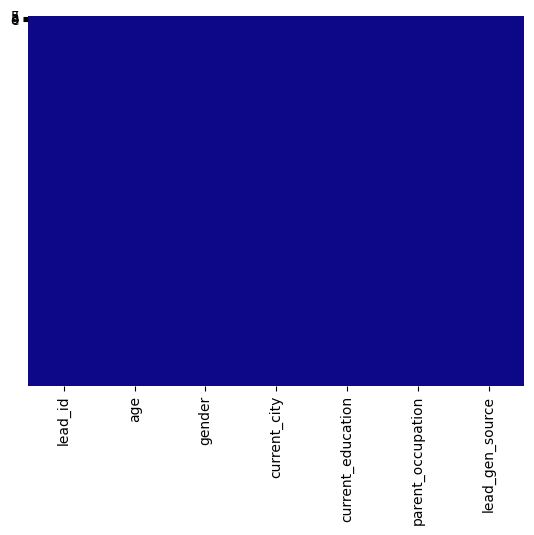

In [11]:
import seaborn as sns 
sns.heatmap(df1.isnull(), cbar=False, yticklabels='False', cmap='plasma') #no find missing value

In [12]:
df1.describe()

,age
count,360.000000
mean,21.561111
std,11.555444
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,211.000000


<AxesSubplot:ylabel='age'>

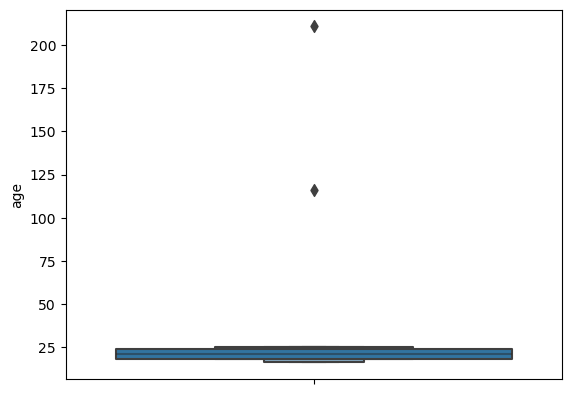

In [13]:
sns.boxenplot(data=df1, y='age')

There are two outliers in the dataframe. We could remove them but first lets see what those outliers are

In [14]:
df1[df1['age'] > 100]

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
17,USR1018,211,MALE,Hyderabad,Degree,IT Employee,social_media
300,USR1301,116,FEMALE,Hyderabad,Intermediate,Private Employee,social_media


The age is given as 211 for USR1018 and 116 for USR1301, with their 'current_education' as Degree and Intermediate respectively. Lets see the average age for these two categories

In [15]:
drooped = df1.drop([17,300])
drooped.shape

(358, 7)

<AxesSubplot:ylabel='age'>

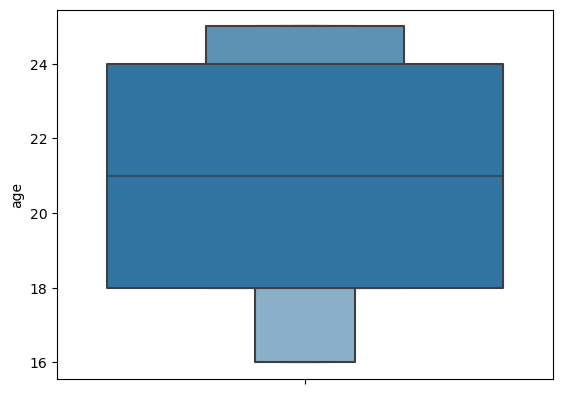

In [16]:
sns.boxenplot(data=drooped, y='age')

<AxesSubplot:xlabel='current_education'>

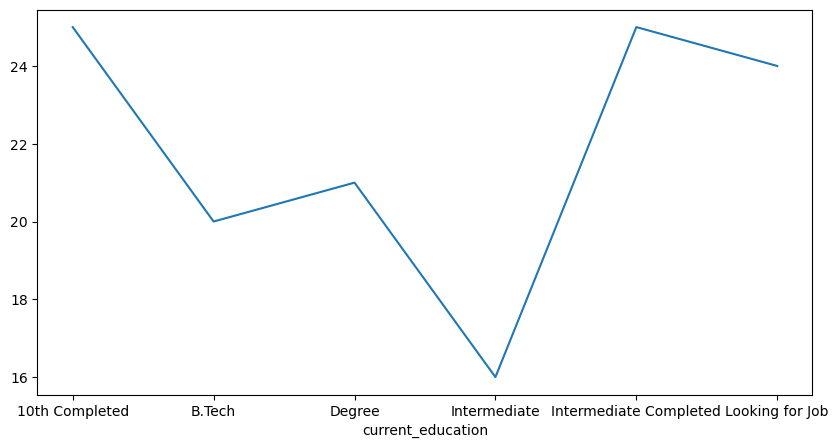

In [17]:
by_ed = drooped.groupby('current_education').median()
by_ed['age'].plot(figsize=(10,5))

In [18]:
drooped[drooped['current_education'] == 'Degree']['age'].unique()

array([21])

In [19]:
drooped[drooped['current_education'] == 'Intermediate']['age'].unique()

array([16])

The only ages for 'Degree' and 'Intermediate' are 21 and 16. Therefore lets replace those values instead of dropping them.

In [20]:
df1.loc[17,'age'] = 21
df1.loc[300,'age'] = 16

In [21]:
df1.shape

(360, 7)

<AxesSubplot:>

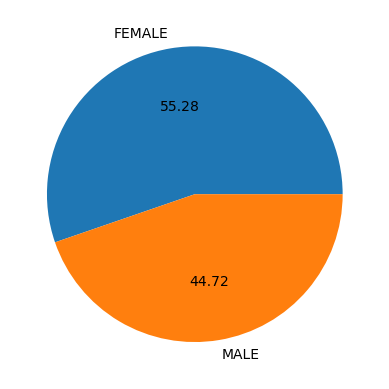

In [65]:
df1.groupby('gender').size().plot(kind='pie', autopct='%.2f', y='lead_id', ylabel='')

The number of females in the lead stage looks more than the number of males but nothing can be said conclusively about this trend at this point

<AxesSubplot:xlabel='current_city', ylabel='count'>

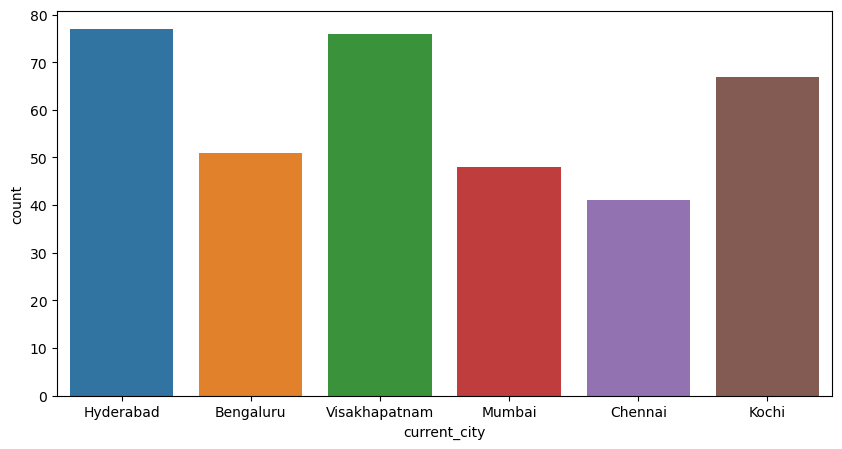

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='current_city', data=df1)

The highest number of leads are from vishakapatnam and Hyderabad but nothing can be said conclusively at this point. The population in other areas might not have received as many calls as these two cities.

<AxesSubplot:>

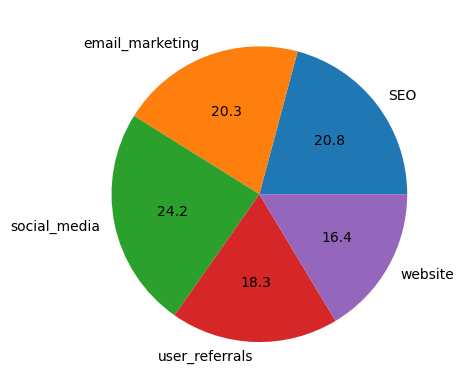

In [24]:
df1.groupby('lead_gen_source').size().plot(kind='pie', autopct='%0.1f', y='lead_id', ylabel='')

It can be conslusively said that social media is the no.1 lead gen source followed by SEO and email_marketing with percentages of 24.3, 20.8 and 20.3 respectively

# Leads leads demo watched details analysis

In [25]:
df4.head()

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54


In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lead_id             194 non-null    object
 1   demo_watched_date   194 non-null    object
 2   language            194 non-null    object
 3   watched_percentage  194 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


In [27]:
df4.isnull().sum()

lead_id               0
demo_watched_date     0
language              0
watched_percentage    0
dtype: int64

<AxesSubplot:>

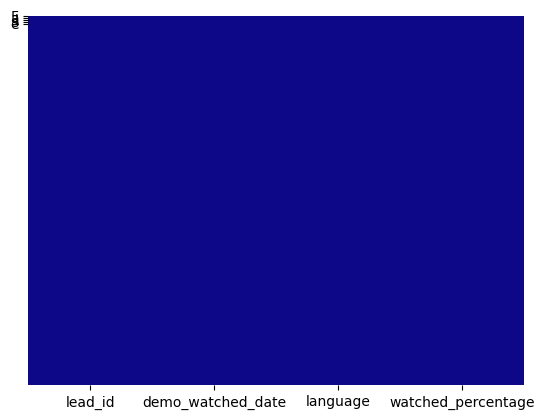

In [28]:
sns.heatmap(df4.isnull(), cbar=False, cmap='plasma', yticklabels='False')

In [29]:
df4.describe()

,watched_percentage
count,194.000000
mean,56.634021
std,43.555635
min,2.000000
25%,35.000000
50%,55.500000
75%,75.750000
max,510.000000


<AxesSubplot:>

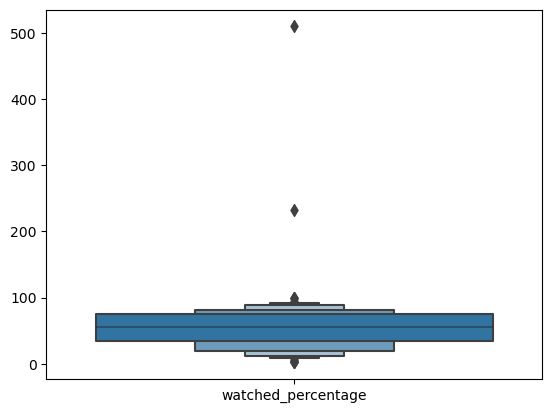

In [30]:
sns.boxenplot(data=df4)

In [31]:
df4[df4['watched_percentage'] > 100]

,lead_id,demo_watched_date,language,watched_percentage
94,USR1138,2/20/2022,English,510
133,USR1213,1/20/2022,Telugu,233


In [32]:
df4.drop([94,133], inplace=True)

<AxesSubplot:>

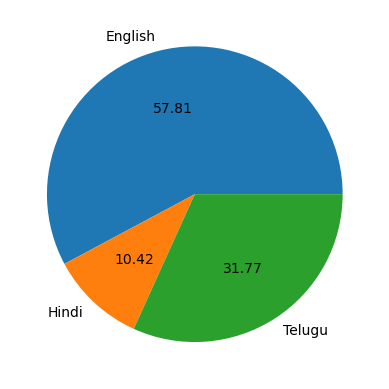

In [87]:
df4.groupby('language').size().plot(kind='pie', autopct='%0.2f', y='lead_id', ylabel='')

In [88]:
df4.groupby('language')['lead_id'].count()

language
English    111
Hindi       20
Telugu      61
Name: lead_id, dtype: int64

English is the majorly watched language
Conclusion: There could variety of reaons why the watched percentage varies. Making the video shorter and concise could encourage more viewers to watch 100% of the demo.

<AxesSubplot:xlabel='watched_percentage', ylabel='Count'>

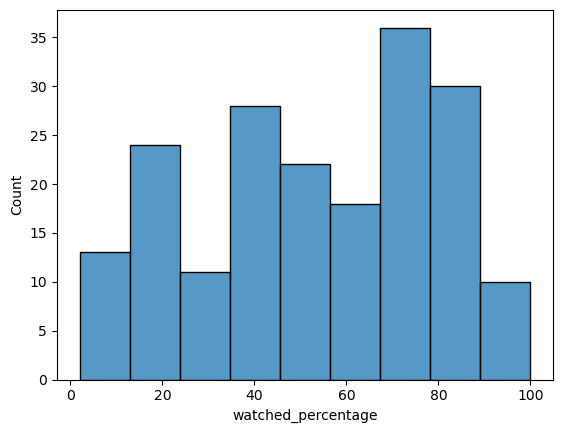

In [34]:
sns.histplot(df4['watched_percentage'])

In [85]:
df4[df4['watched_percentage'] >= 90]

,lead_id,demo_watched_date,language,watched_percentage
19,USR1021,1/2/2022,English,100
62,USR1077,2/21/2022,English,100
65,USR1083,1/8/2022,English,90
67,USR1090,1/11/2022,English,91
68,USR1091,1/20/2022,English,92
122,USR1192,1/17/2022,English,90
123,USR1193,1/20/2022,English,95
124,USR1195,1/17/2022,English,100
125,USR1197,2/22/2022,Telugu,90
165,USR1273,1/19/2022,English,91


The maximum count is 35, which corresponds to 80% watched. Only around 10 people have wwacthed 100% of the video, but majority of the people have watched more than half of the video

In [35]:
df3.head()

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jnr_sm_id       2192 non-null   object
 1   lead_id         2192 non-null   object
 2   lead_stage      2192 non-null   object
 3   call_done_date  2192 non-null   object
 4   call_status     2192 non-null   object
 5   call_reason     2192 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


In [37]:
df3.shape

(2192, 6)

<AxesSubplot:>

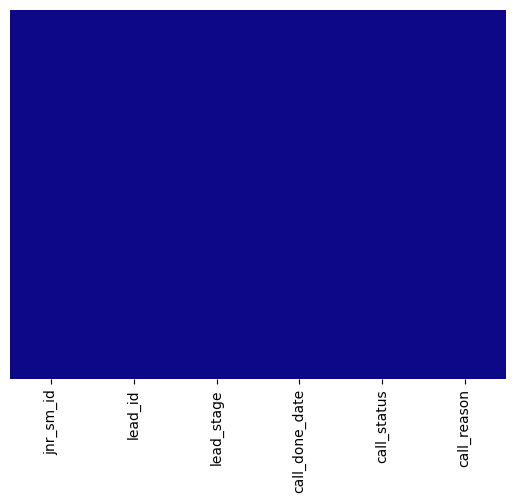

In [38]:
sns.heatmap(df3.isnull(), cbar=False, yticklabels=False, cmap='plasma')

In [39]:
df3.describe()

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
count,2192,2192,2192,2192,2192,2192
unique,16,358,4,40,2,8
top,JNR1012MG,USR1193,lead,1/8/2022,successful,demo_not_attended
freq,164,11,1547,156,1866,701


<AxesSubplot:xlabel='call_status', ylabel='count'>

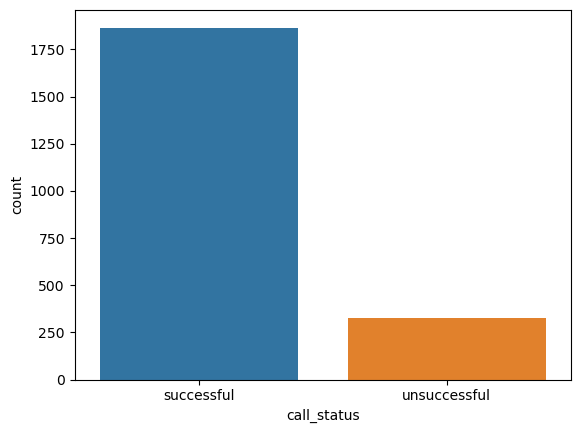

In [40]:
sns.countplot(data=df3, x='call_status')

<AxesSubplot:xlabel='lead_stage', ylabel='count'>

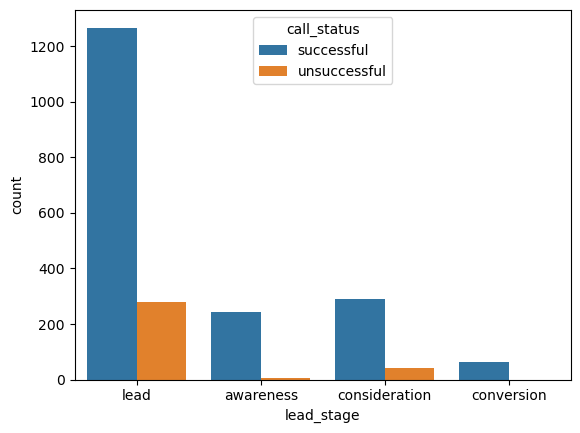

In [41]:
sns.countplot(data=df3, x='lead_stage', hue='call_status')

1) Even though there are more than 1200 successful call statuses in the lead stage, when it comes to awareness the number dramatically drops to around 200 which is just 16% of the success in the lead stage.

2) 'Awareness' stage however has a lower unsuccessful rate compared to 'lead stage' and 'consideration' stage

3) The number of people also decrease drastically when it comes to conversion stage. Lets analyse the reason later using df5 dataframe

In [42]:
df3.groupby(['lead_stage','call_status']).count()

jnr_sm_id  lead_id  call_done_date  call_reason
lead_stage    call_status                                                  
awareness     successful          245      245             245          245
              unsuccessful          5        5               5            5
consideration successful          290      290             290          290
              unsuccessful         41       41              41           41
conversion    successful           64       64              64           64
lead          successful         1267     1267            1267         1267
              unsuccessful        280      280             280          280

For 'awareness' only 2% is unsuccessful, for 'consideration' the number of unsuccessful cases go upto 12.38%, but conversion has 100% sucess rate

<AxesSubplot:xlabel='call_reason', ylabel='count'>

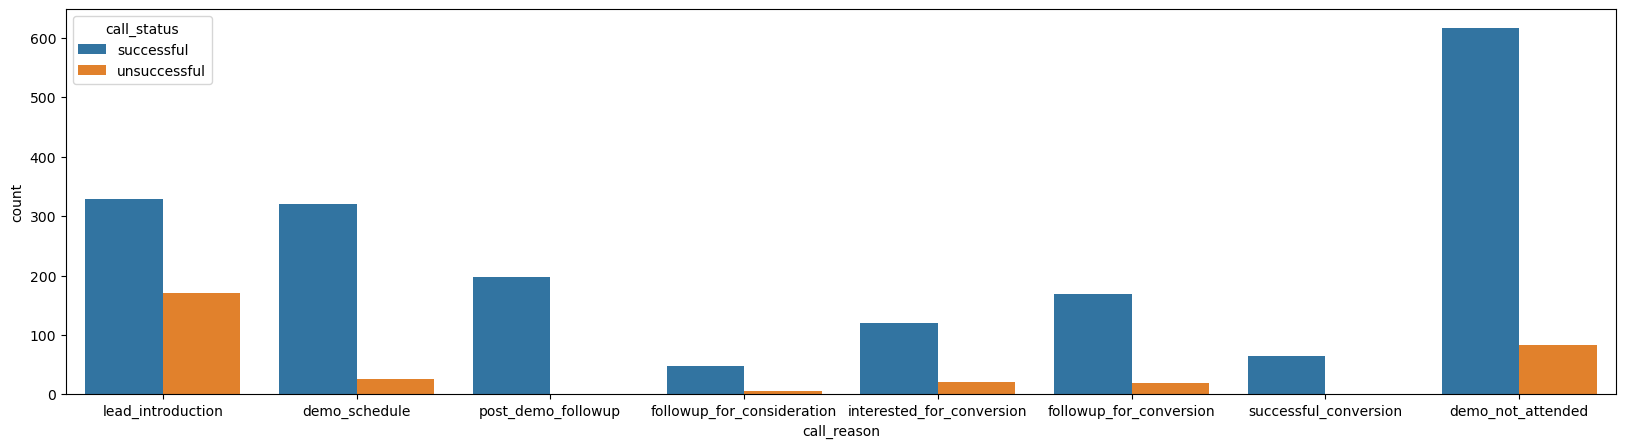

In [43]:
plt.figure(figsize=(20,5))
sns.countplot(data=df3, x='call_reason', hue='call_status')

In [44]:
df3.groupby(['call_reason','call_status']).count()

jnr_sm_id  lead_id  lead_stage  \
call_reason                call_status                                    
demo_not_attended          successful          617      617         617   
                           unsuccessful         84       84          84   
demo_schedule              successful          321      321         321   
                           unsuccessful         26       26          26   
followup_for_consideration successful           48       48          48   
                           unsuccessful          5        5           5   
followup_for_conversion    successful          169      169         169   
                           unsuccessful         20       20          20   
interested_for_conversion  successful          121      121         121   
                           unsuccessful         21       21          21   
lead_introduction          successful          329      329         329   
                           unsuccessful        170      170         170   
post_demo_followup         successful          197      197         197   
successful_conversion      successful           64       64          64   

                                         call_done_date  
call_reason                call_status                   
demo_not_attended          successful               617  
                           unsuccessful              84  
demo_schedule              successful               321  
                           unsuccessful              26  
followup_for_consideration successful                48  
                           unsuccessful               5  
followup_for_conversion    successful               169  
                           unsuccessful              20  
interested_for_conversion  successful               121  
                           unsuccessful              21  
lead_introduction          successful               329  
                           unsuccessful             170  
post_demo_followup         successful               197  
successful_conversion      successful                64

Demo not attended seems to be the reason why most follow-ups calls take place

In [45]:
converted = df3[df3['lead_stage']=='conversion']
converted.head()

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
9,JNR1001MG,USR1002,conversion,1/7/2022,successful,successful_conversion
33,JNR1001MG,USR1007,conversion,1/14/2022,successful,successful_conversion
54,JNR1001MG,USR1011,conversion,1/22/2022,successful,successful_conversion
62,JNR1001MG,USR1012,conversion,1/19/2022,successful,successful_conversion
72,JNR1001MG,USR1013,conversion,1/21/2022,successful,successful_conversion


In [46]:
converted.shape

(64, 6)

In [47]:
converted_leads = pd.merge(df1, converted, how='inner',on='lead_id')
converted_leads

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,jnr_sm_id,lead_stage,call_done_date,call_status,call_reason
0,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,conversion,1/7/2022,successful,successful_conversion
1,USR1007,16,FEMALE,Hyderabad,Intermediate,Professor/Faculty,social_media,JNR1001MG,conversion,1/14/2022,successful,successful_conversion
2,USR1011,20,FEMALE,Hyderabad,B.Tech,Private Employee,website,JNR1001MG,conversion,1/22/2022,successful,successful_conversion
3,USR1012,20,FEMALE,Hyderabad,B.Tech,Business,social_media,JNR1001MG,conversion,1/19/2022,successful,successful_conversion
4,USR1013,21,FEMALE,Hyderabad,Degree,Lawyer,SEO,JNR1001MG,conversion,1/21/2022,successful,successful_conversion
...,...,...,...,...,...,...,...,...,...,...,...,...
59,USR1311,20,FEMALE,Kochi,B.Tech,Private Employee,website,JNR1016MG,conversion,1/21/2022,successful,successful_conversion
60,USR1312,20,FEMALE,Kochi,B.Tech,Business,social_media,JNR1016MG,conversion,1/18/2022,successful,successful_conversion
61,USR1313,21,FEMALE,Kochi,Degree,Lawyer,SEO,JNR1016MG,conversion,1/21/2022,successful,successful_conversion
62,USR1314,22,MALE,Mumbai,Looking for Job,IT Employee,SEO,JNR1016MG,conversion,1/20/2022,successful,successful_conversion


In [48]:
converted_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            64 non-null     object
 1   age                64 non-null     int64 
 2   gender             64 non-null     object
 3   current_city       64 non-null     object
 4   current_education  64 non-null     object
 5   parent_occupation  64 non-null     object
 6   lead_gen_source    64 non-null     object
 7   jnr_sm_id          64 non-null     object
 8   lead_stage         64 non-null     object
 9   call_done_date     64 non-null     object
 10  call_status        64 non-null     object
 11  call_reason        64 non-null     object
dtypes: int64(1), object(11)
memory usage: 6.5+ KB


<AxesSubplot:xlabel='current_city', ylabel='count'>

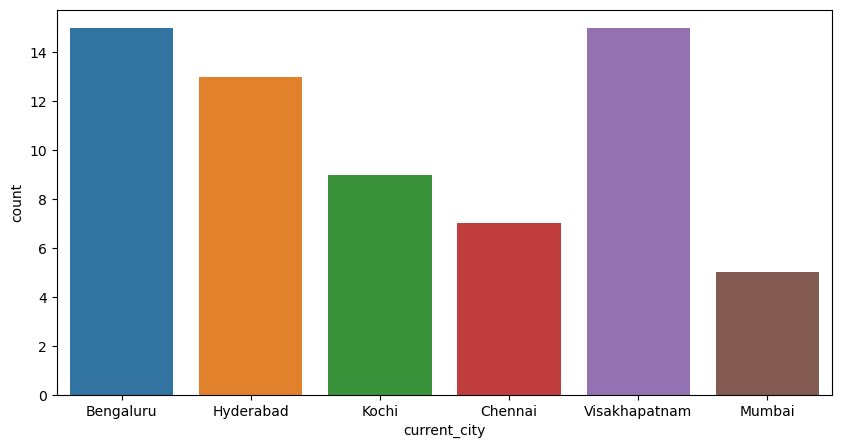

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(data=converted_leads, x='current_city')

In [89]:
converted_leads.groupby('current_city')['lead_id'].count()

current_city
Bengaluru        15
Chennai           7
Hyderabad        13
Kochi             9
Mumbai            5
Visakhapatnam    15
Name: lead_id, dtype: int64

### Location analysis from those who were converted:
1) Out of the leads who were succesfully converted, the highest number of people are coming from Vishakapatnam and Bengaluru.

2) Initially Bengaluru only ranked 4th in the 'leads_basic_details' dataframe. Even then, the number of people who got converted from Bengaluru match Vishakpatnam. Hyderbad ranked second but the turnover percentage is very less.

3) This means that Bengaluru has to be given more attention to get more users

<AxesSubplot:xlabel='lead_gen_source', ylabel='count'>

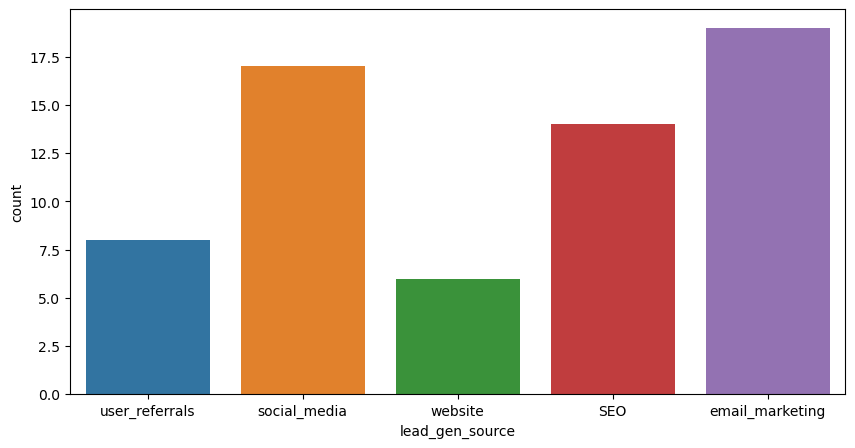

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data=converted_leads, x='lead_gen_source')

Marketing analysis from those who were converted:
Email marketing seems to be the way majority of the leads who were converted got informed about the company

### Gender analysis on converted leads:

<AxesSubplot:xlabel='gender', ylabel='count'>

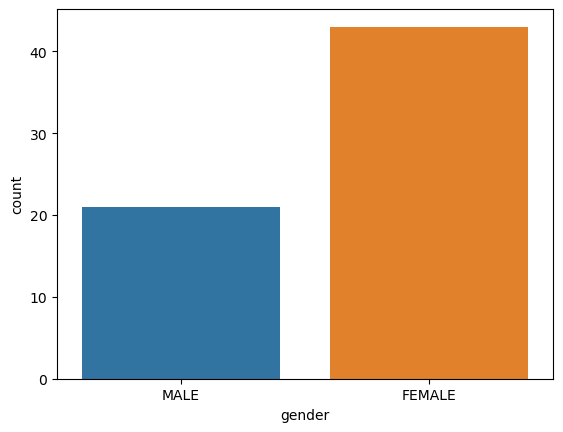

In [51]:
sns.countplot(data=converted_leads, x='gender')

### Age analysis on converted leads:

<AxesSubplot:xlabel='age', ylabel='count'>

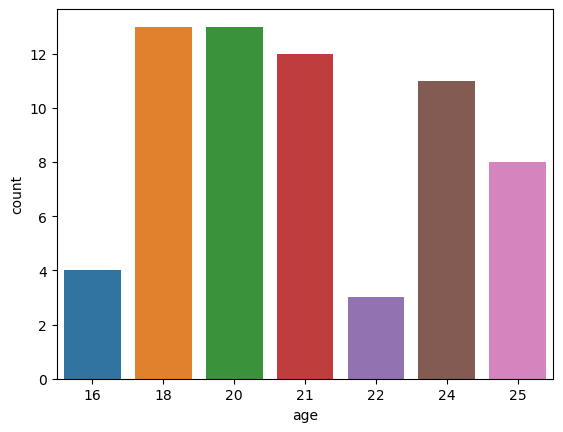

In [52]:
sns.countplot(data=converted_leads, x='age')

Most of the leads who got converted happen to be 18-21 years old.

## Sales manager assigned leads analysis

<AxesSubplot:xlabel='jnr_sm_id', ylabel='count'>

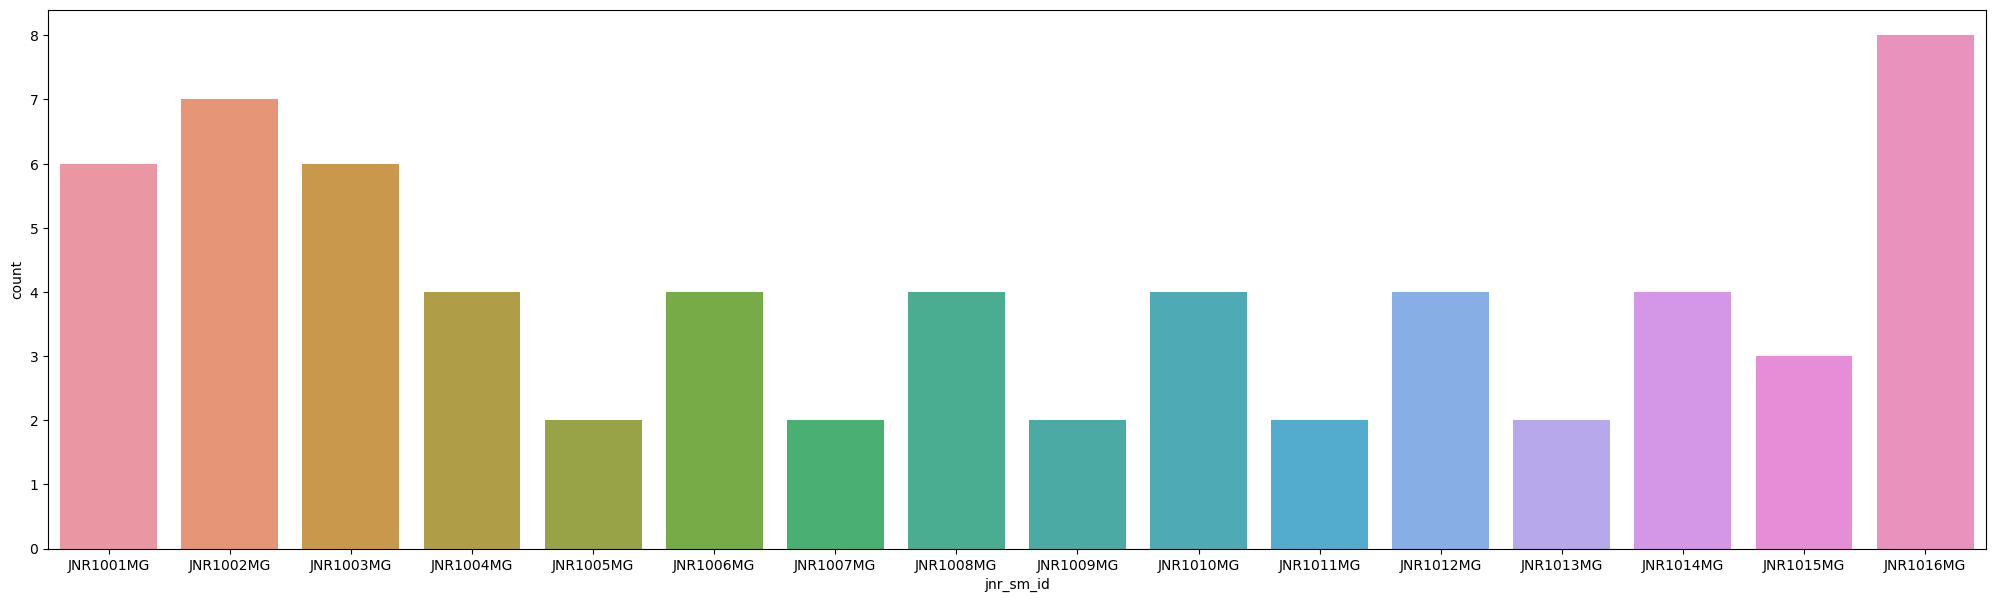

In [53]:
plt.figure(figsize=(25,7))
sns.countplot(data=converted_leads, x='jnr_sm_id') #checking the best performed junior sales manager

In [54]:
converted_leads.groupby('jnr_sm_id').count()['call_status']

jnr_sm_id
JNR1001MG    6
JNR1002MG    7
JNR1003MG    6
JNR1004MG    4
JNR1005MG    2
JNR1006MG    4
JNR1007MG    2
JNR1008MG    4
JNR1009MG    2
JNR1010MG    4
JNR1011MG    2
JNR1012MG    4
JNR1013MG    2
JNR1014MG    4
JNR1015MG    3
JNR1016MG    8
Name: call_status, dtype: int64

Junior sales manager with jnr_sm_id JNR1016MG seems to be the best performing one followed by JNR1002MG and JNR1001MG

In [55]:
junior_managers = converted_leads.groupby('jnr_sm_id').count()['call_status']

In [56]:
sales = pd.merge(df2, junior_managers, how='inner', on='jnr_sm_id')
sales

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id,call_status
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001,6
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002,6
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003,6
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004,6
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005,6
...,...,...,...,...,...,...
355,SNR504MG,JNR1016MG,1/8/2022,2,USR1330,8
356,SNR504MG,JNR1016MG,1/15/2022,3,USR1331,8
357,SNR504MG,JNR1016MG,2/19/2022,4,USR1332,8
358,SNR504MG,JNR1016MG,1/1/2022,1,USR1333,8


In [57]:
sales[sales['jnr_sm_id']=='JNR1016MG']

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id,call_status
333,SNR504MG,JNR1016MG,1/1/2022,1,USR1301,8
334,SNR504MG,JNR1016MG,1/1/2022,1,USR1302,8
335,SNR504MG,JNR1016MG,1/1/2022,1,USR1303,8
336,SNR504MG,JNR1016MG,1/1/2022,1,USR1304,8
337,SNR504MG,JNR1016MG,1/1/2022,1,USR1305,8
338,SNR504MG,JNR1016MG,1/8/2022,2,USR1306,8
339,SNR504MG,JNR1016MG,1/8/2022,2,USR1307,8
340,SNR504MG,JNR1016MG,1/8/2022,2,USR1308,8
341,SNR504MG,JNR1016MG,1/8/2022,2,USR1309,8
342,SNR504MG,JNR1016MG,1/8/2022,2,USR1310,8


### Leads reasons for no interest analysis

In [58]:
df5.head()

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN


<AxesSubplot:>

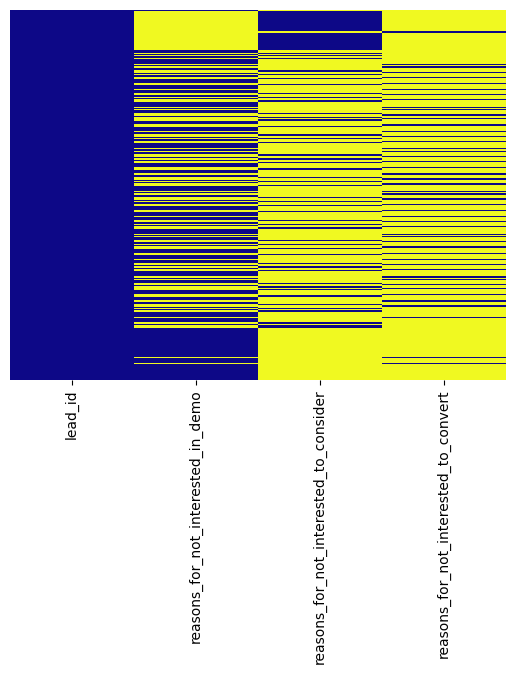

In [59]:
sns.heatmap(df5.isnull(), yticklabels=False, cmap='plasma', cbar=False)

In [60]:
df5.isnull().sum()

lead_id                                     0
reasons_for_not_interested_in_demo        130
reasons_for_not_interested_to_consider    215
reasons_for_not_interested_to_convert     243
dtype: int64

In [61]:
df5['reasons_for_not_interested_in_demo'].unique()

array(['No time for student', nan, 'Student not interested in domain',
       'Wants offline classes', "Can't afford", 'Cannot afford',
       'Will join in final year'], dtype=object)

In [62]:
df5['reasons_for_not_interested_in_demo'].replace({'Cannot afford':"Can't afford"}, inplace=True) #both are same

<AxesSubplot:>

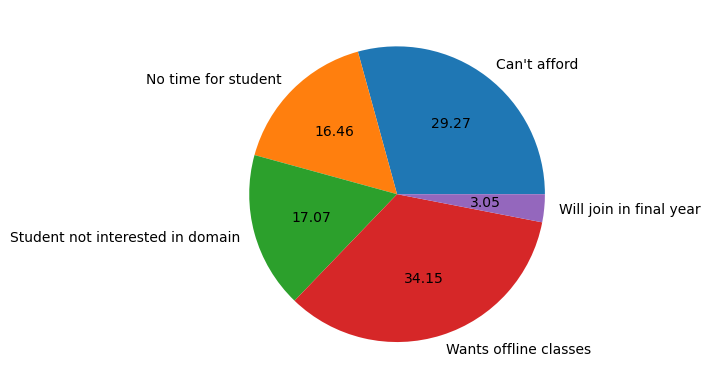

In [63]:
df5.groupby('reasons_for_not_interested_in_demo').size().plot(kind='pie', autopct='%.2f', y='lead_id', ylabel='')

<AxesSubplot:>

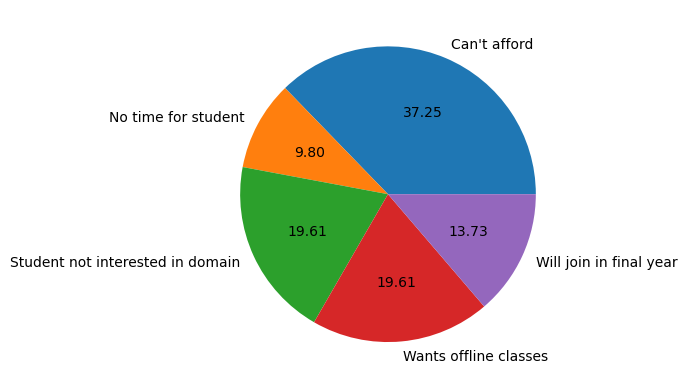

In [64]:
df5.groupby('reasons_for_not_interested_to_convert').size().plot(kind='pie', autopct='%.2f', y='lead_id', ylabel='')

The most frequent reason for not being interested is affordability followed by preference of offline classes

0